# Analysis with the clean dataset

In [122]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# Reading our clean dataframe
df = pd.read_pickle("sharks_df.csv")

# Encode categorical values
df["Type"] = df["Type"].astype('category')
df["Country"] = df["Country"].astype('category')
df["Activity"] = df["Activity"].astype('category')
df["Sex"] = df["Sex"].astype('category')
df["Fatal"] = df["Fatal"].astype('category')
df["Type_c"] = df["Type"].cat.codes
df["Country_c"] = df["Country"].cat.codes
df["Activity_c"] = df["Activity"].cat.codes
df["Sex_c"] = df["Sex"].cat.codes
df["Fatal_c"] = df["Fatal"].cat.codes

In [124]:
# No correlation was found; higher correlation was between Years and Fatal_
corr = df.corr()
corr

,Age,Months,Years,Type_c,Country_c,Activity_c,Sex_c,Fatal_c
Age,1.000000,0.010478,0.225024,-0.050217,-0.018303,-0.026009,0.025749,-0.069980
Months,0.010478,1.000000,0.073945,0.006807,0.088543,0.002859,0.013939,-0.026625
Years,0.225024,0.073945,1.000000,0.016169,0.195985,-0.000862,-0.027025,-0.383088
Type_c,-0.050217,0.006807,0.016169,1.000000,0.006081,0.088478,0.043538,0.137425
Country_c,-0.018303,0.088543,0.195985,0.006081,1.000000,0.054204,0.024988,-0.160197
Activity_c,-0.026009,0.002859,-0.000862,0.088478,0.054204,1.000000,-0.057603,-0.019513
Sex_c,0.025749,0.013939,-0.027025,0.043538,0.024988,-0.057603,1.000000,0.030034
Fatal_c,-0.069980,-0.026625,-0.383088,0.137425,-0.160197,-0.019513,0.030034,1.000000


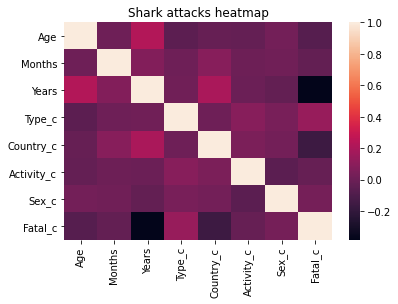

In [125]:
heatmap = sns.heatmap(corr);
heatmap.set_title('Shark attacks heatmap');

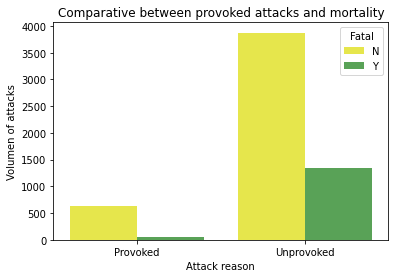

In [77]:
# The reason of the attack, provoked or unprovoked by humans, doesn't seem to be determinative for the mortality of the attack
plot_types =sns.countplot(x = df.Type, 
            hue = df.Fatal,
             palette = 'Set1_r');
plot_types.set_title('Comparative between provoked attacks and mortality')
plot_types.set(xlabel = 'Attack reason', 
                ylabel='Volumen of attacks');

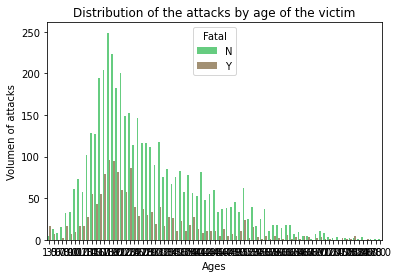

In [119]:
# Doesn't seem to be a relation between mortality of the attack and age of the person attacked
plot_ages = sns.countplot(x = df.Age, 
                          hue = df.Fatal,
                          palette = 'RdBu_r');
plot_ages.set_title('Distribution of the attacks by age of the victim')
plot_ages.set(xlabel = 'Ages', 
                ylabel = 'Volumen of attacks');

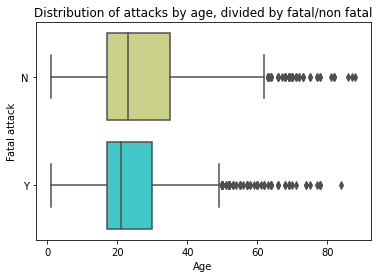

In [99]:
# In comparison with non-fatal attacks, fatal attacks doesn't happen often to people older than 50
box_age = sns.boxplot(x = df.Age, 
            y = df.Fatal,
           palette = 'rainbow_r');
box_age.set_title('Distribution of attacks by age, divided by fatal/non fatal')
box_age.set(xlabel = 'Age', 
                ylabel = 'Fatal attack');

## <span style="color:green"> Probability of suffering a fatal attack is higher on January and December </span>

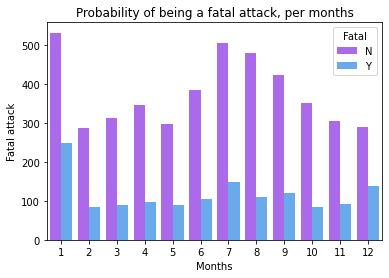

In [80]:
# Probability of being a fatal attack is higher on January and December
plot_months = sns.countplot(x = df.Months, 
            hue = df.Fatal,
             palette = 'cool_r');
plot_months.set_title('Probability of being a fatal attack, per months')
plot_months.set(xlabel = 'Months', 
                ylabel = 'Fatal attack');

## <span style="color:green">  Shark attacks had a peak in the early 60s      </span>
## <span style="color:green">  Records before 1900s mostly kept fatal-shark attacks      </span>
## <span style="color:green">  Nowadays there is a decreasing tendence in fatal attacks     </span>


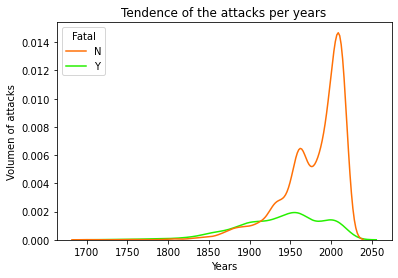

In [115]:
# Shark attack records have been gradually increasing until our days, probably for the increment of records instead of for the increment of attacks
# There is a remarkable peak in the attacks at the early 1960s
# Shack attacks registered before 1900s seems to be only the fatal-shark attacks, not keeping records of the sharck attacks without mortal victims
# During last decades seems to be a decreased number of fatal attacks
plot_years = sns.kdeplot(x = df.Years, 
                         hue = df.Fatal,
                         palette = 'gist_ncar_r');
plot_years.set_title('Tendence of the attacks per years')
plot_years.set(xlabel = 'Years', 
                ylabel = 'Volumen of attacks');

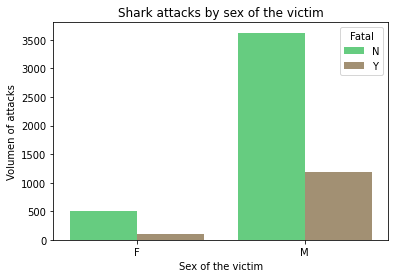

In [120]:
plot_sex = sns.countplot(x = df.Sex, 
            hue = df.Fatal,
             palette = 'terrain');
plot_sex.set_title('Shark attacks by sex of the victim')
plot_sex.set(xlabel = 'Sex of the victim', 
                ylabel = 'Volumen of attacks');

In [91]:
# There is not correlation between country and fatal attacks
df['Country_c'].corr(df['Fatal_c'])

-0.16019715840635956

In [121]:
# There is not correlation between activity and fatal attacks
df['Activity_c'].corr(df['Fatal_c'])

-0.019512732952994764

## <span style="color:green">  Countries with higher number of shark attack registered are:</span>
- USA
- Australia
- South Africa

In [113]:
df.Country.value_counts(dropna=False).head(5)

USA                 2164
AUSTRALIA           1274
SOUTH AFRICA         562
PAPUA NEW GUINEA     125
NEW ZEALAND          122
Name: Country, dtype: int64

## <span style="color:green">  Activities with higher number of shark attack records are: </span>
- Swimming
- Sailing
- Surfing

In [126]:
df.Activity.value_counts().head(5)

Swimming    1221
Sailing     1104
Surfing     1095
Diving       526
nan          459
Name: Activity, dtype: int64